# L03.1 Linear Regression Practice

In [2]:
import torch

x = torch.tensor([[1, 2, 3],[4, 5, 6], [7, 8, 9]])
print(x.type())
print(x)

torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [3]:
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([3, 3])
torch.Size([3, 3])
2


In [4]:
y = torch.FloatTensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[1, 2], [3, 4]]])
print(y.shape)
print(y.ndimension()) # == len(y.shape)

torch.Size([3, 2, 2])
3


In [5]:
print(y)
print("origianl shape: ", y.shape)

y0 =y.unsqueeze(0)
print(y0)
print("unsqueeze(0): ", y0.shape)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[1., 2.],
         [3., 4.]]])
origianl shape:  torch.Size([3, 2, 2])
tensor([[[[1., 2.],
          [3., 4.]],

         [[5., 6.],
          [7., 8.]],

         [[1., 2.],
          [3., 4.]]]])
unsqueeze(0):  torch.Size([1, 3, 2, 2])


In [6]:
x = torch.FloatTensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[1, 2], [3, 4]]])

x0 = x.unsqueeze(0) # [3, 2, 2] --> [1, 3, 2, 2]
x1 = x.unsqueeze(1) # [3, 2, 2] --> [3, 1, 2, 2]
x2 = x.unsqueeze(2) # [3, 2, 2] --> [3, 2, 1, 2]
x3 = x.unsqueeze(3) # [3, 2, 2] --> [3, 2, 2, 1]

print(x0)
print(x1)
print(x2)
print(x3)

tensor([[[[1., 2.],
          [3., 4.]],

         [[5., 6.],
          [7., 8.]],

         [[1., 2.],
          [3., 4.]]]])
tensor([[[[1., 2.],
          [3., 4.]]],


        [[[5., 6.],
          [7., 8.]]],


        [[[1., 2.],
          [3., 4.]]]])
tensor([[[[1., 2.]],

         [[3., 4.]]],


        [[[5., 6.]],

         [[7., 8.]]],


        [[[1., 2.]],

         [[3., 4.]]]])
tensor([[[[1.],
          [2.]],

         [[3.],
          [4.]]],


        [[[5.],
          [6.]],

         [[7.],
          [8.]]],


        [[[1.],
          [2.]],

         [[3.],
          [4.]]]])


In [7]:
xt = x.unsqueeze(0).unsqueeze(1).unsqueeze(0).unsqueeze(5) # 1, 1, 1, 3, 2, 1, 2
print(xt.squeeze().shape)

torch.Size([3, 2, 2])


In [8]:
x.view(3, -1)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.],
        [1., 2., 3., 4.]])

In [9]:
x = torch.FloatTensor([[1, 2], [3, 4], [5, 6]]) # 3 x 2
w = torch.rand(1, 2, dtype=torch.float)  # 2 x 1
b = torch.rand(3, 1, dtype=torch.float)

print(x @ w.T + b)

tensor([[ 3.4734],
        [ 7.3719],
        [10.9609]])


In [10]:
w = torch.tensor(4.0, requires_grad=True)
a = w*3
l = a**2
l.backward()
print(w.grad)

tensor(72.)


## Linear Regression 실습

In [11]:
import torch

x_train = torch.FloatTensor([[1, 2], [3, 2], [3, 7], [1, 1], [1, 0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])

W = torch.randn(2, 1)
b = torch.randn(1, 1)
print(W, b)

lr = 0.01

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    h = x_train @ W + b
    cost = ((y_train - h)**2).mean()

    cost.backward()

    with torch.no_grad():
        W = W - lr * W.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {W.squeeze().tolist()}, b = {b.squeeze().item()}')


tensor([[ 2.4372],
        [-0.8500]]) tensor([[0.6085]])
Epoch 0: Cost = 95.86886596679688, W = [2.6965901851654053, -0.23044425249099731], b = 0.6853632926940918
Epoch 100: Cost = 1.229596734046936, W = [1.1212685108184814, 2.965062141418457], b = -1.7347288131713867
Epoch 200: Cost = 0.48948830366134644, W = [1.1559178829193115, 3.130801200866699], b = -2.5240485668182373
Epoch 300: Cost = 0.24972927570343018, W = [1.3706326484680176, 3.1114258766174316], b = -2.9586830139160156
Epoch 400: Cost = 0.12831704318523407, W = [1.5460699796676636, 3.0818793773651123], b = -3.2553985118865967
Epoch 500: Cost = 0.06594415754079819, W = [1.6742745637893677, 3.058924436569214], b = -3.4664249420166016
Epoch 600: Cost = 0.033889882266521454, W = [1.7664583921432495, 3.0422675609588623], b = -3.6175148487091064
Epoch 700: Cost = 0.01741660386323929, W = [1.8325746059417725, 3.030303478240967], b = -3.725806713104248
Epoch 800: Cost = 0.00895078293979168, W = [1.8799750804901123, 3.0217242240905

In [12]:
x_test = torch.FloatTensor([[5, 10], [2, 7], [3, 10]])

y_test = x_test @ W + b
print(y_test)

tensor([[35.9999],
        [21.0001],
        [32.0000]])


## Linear Regression with Scikit-learn

In [13]:
from sklearn.linear_model import LinearRegression

x = [[1, 2], [3, 2], [3 ,7], [1, 1], [1, 0]]
y = [[4], [8], [23], [1], [-2]]

lr = LinearRegression() # 모델 생성
lr.fit(x, y) # 학습 (피팅)

print(lr.coef_, lr.intercept_)

[[2. 3.]] [-4.]


In [14]:
x_test = [[5, 10], [2, 7], [10, 3]]
y_test = lr.predict(x_test)
print(y_test)

[[36.]
 [21.]
 [25.]]


# L04.1 Logistic Regression Practice

In [15]:
import torch

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [16]:
import math

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(2001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)
    #h = 1 / (1 + math.e ** (-(x_train @ w + b)))

    cost = torch.mean(-y_train * torch.log(h) - (1-y_train) * torch.log(1-h))  # BCE

    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 0.6348510384559631, W = -0.8427649736404419, b = 1.3356882333755493
Epoch 100: Cost = 0.4152984619140625, W = -1.5323004722595215, b = 4.6559062004089355
Epoch 200: Cost = 0.3971690833568573, W = -1.9445363283157349, b = 5.9137678146362305
Epoch 300: Cost = 0.3901188373565674, W = -2.205501079559326, b = 6.7037153244018555
Epoch 400: Cost = 0.3866386413574219, W = -2.3900508880615234, b = 7.259995937347412
Epoch 500: Cost = 0.38471150398254395, W = -2.5278894901275635, b = 7.67438268661499
Epoch 600: Cost = 0.3835696280002594, W = -2.6342477798461914, b = 7.993556022644043
Epoch 700: Cost = 0.38286229968070984, W = -2.71809720993042, b = 8.244857788085938
Epoch 800: Cost = 0.3824102580547333, W = -2.7852070331573486, b = 8.445795059204102
Epoch 900: Cost = 0.3821147680282593, W = -2.839517116546631, b = 8.608287811279297
Epoch 1000: Cost = 0.38191816210746765, W = -2.883841037750244, b = 8.740824699401855
Epoch 1100: Cost = 0.38178572058677673, W = -2.92024564743042, b 

In [17]:
bce = torch.nn.BCELoss()

w = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(2001):
    w.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(x_train @ w + b)

    cost = bce(h, y_train)
    cost.backward()

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 1.7255052328109741, W = -0.3946610689163208, b = -0.0731736421585083
Epoch 100: Cost = 0.42037227749824524, W = -1.4489269256591797, b = 4.3996782302856445
Epoch 200: Cost = 0.3987672030925751, W = -1.8971211910247803, b = 5.769762992858887
Epoch 300: Cost = 0.3908407688140869, W = -2.1734426021575928, b = 6.606895923614502
Epoch 400: Cost = 0.3870192766189575, W = -2.366689920425415, b = 7.189676761627197
Epoch 500: Cost = 0.384930282831192, W = -2.510140895843506, b = 7.6210737228393555
Epoch 600: Cost = 0.38370242714881897, W = -2.620401620864868, b = 7.952032566070557
Epoch 700: Cost = 0.3829458951950073, W = -2.7070984840393066, b = 8.211909294128418
Epoch 800: Cost = 0.382464200258255, W = -2.776355504989624, b = 8.419301986694336
Epoch 900: Cost = 0.38215041160583496, W = -2.832324981689453, b = 8.586774826049805
Epoch 1000: Cost = 0.3819420337677002, W = -2.8779520988464355, b = 8.723219871520996
Epoch 1100: Cost = 0.38180193305015564, W = -2.9153969287872314, b

In [18]:
x_test = torch.FloatTensor([[4.5],[1.1]])

#test_result = torch.sigmoid(torch.mm(x_test, w) + b)
test_result = torch.sigmoid(x_test @ w + b)

print(test_result)

tensor([[0.0109],
        [0.9973]])


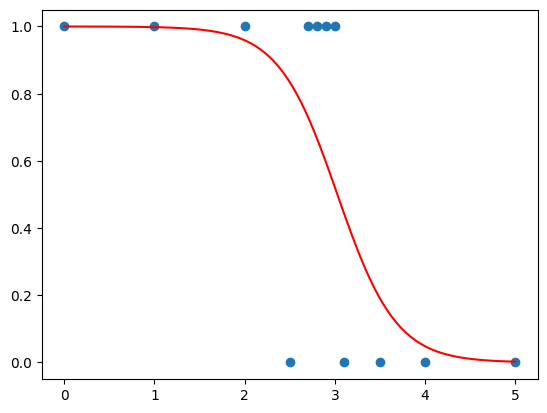

In [22]:
import matplotlib.pyplot as plt

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(X@w + b)

plt.scatter(x_train, y_train)
plt.plot(X, Y, c='red')
plt.show()

In [24]:
bce = torch.nn.BCELoss()

w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optimizer = torch.optim.Adam([w, b], lr=1.0)

for epoch in range(2001):

    h = torch.sigmoid(x_train @ w + b)
    cost = bce(h, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Cost = {cost.item()}, W = {w.squeeze().tolist()}, b = {b.squeeze().item()}')

Epoch 0: Cost = 2.521151304244995, W = 1.0635719299316406, b = -3.042440891265869
Epoch 100: Cost = 0.3821932375431061, W = -2.832634210586548, b = 8.573307991027832
Epoch 200: Cost = 0.3815056085586548, W = -3.062659978866577, b = 9.275191307067871
Epoch 300: Cost = 0.38149091601371765, W = -3.100795269012451, b = 9.388652801513672
Epoch 400: Cost = 0.3814907371997833, W = -3.1037611961364746, b = 9.397481918334961
Epoch 500: Cost = 0.3814907371997833, W = -3.103851318359375, b = 9.397748947143555
Epoch 600: Cost = 0.3814908266067505, W = -3.103851556777954, b = 9.397748947143555
Epoch 700: Cost = 0.3814907968044281, W = -3.103851556777954, b = 9.397748947143555
Epoch 800: Cost = 0.3814907968044281, W = -3.103851318359375, b = 9.397748947143555
Epoch 900: Cost = 0.3814908266067505, W = -3.1038520336151123, b = 9.397750854492188
Epoch 1000: Cost = 0.3814907968044281, W = -3.1038525104522705, b = 9.397751808166504
Epoch 1100: Cost = 0.3814907371997833, W = -3.1038522720336914, b = 9.397

## sklearn에서LogisticRegression사용

In [25]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] 

model = LogisticRegression(penalty=None)
model.fit(x_train,y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5], [1.1]]
test_result = model.predict(x_test)
print(test_result)



[[-3.10428163]] [9.39919938]
[0 1]


# L06.1 Softmax Regression Practice

In [25]:
import torch
x_train = torch.FloatTensor([ [1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7] ])
y_train = torch.FloatTensor([ [0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0] ])

In [26]:
W = torch.randn(4, 3, requires_grad=True)
b = torch.randn(1, 3, requires_grad=True)

optimizer = torch.optim.Adam([W, b], lr=0.1)


In [27]:
for epoch in range(3001):
    h = torch.softmax(torch.mm(x_train, W)+b, dim=1)
    cost = -torch.mean(torch.sum(y_train * torch.log(h), dim=1))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 9.688851
epoch: 100, cost: 0.471716
epoch: 200, cost: 0.314578
epoch: 300, cost: 0.223997
epoch: 400, cost: 0.168306
epoch: 500, cost: 0.131756
epoch: 600, cost: 0.106256
epoch: 700, cost: 0.087608
epoch: 800, cost: 0.073480
epoch: 900, cost: 0.062486
epoch: 1000, cost: 0.053744
epoch: 1100, cost: 0.046672
epoch: 1200, cost: 0.040866
epoch: 1300, cost: 0.036039
epoch: 1400, cost: 0.031984
epoch: 1500, cost: 0.028543
epoch: 1600, cost: 0.025600
epoch: 1700, cost: 0.023062
epoch: 1800, cost: 0.020859
epoch: 1900, cost: 0.018936
epoch: 2000, cost: 0.017246
epoch: 2100, cost: 0.015754
epoch: 2200, cost: 0.014430
epoch: 2300, cost: 0.013251
epoch: 2400, cost: 0.012196
epoch: 2500, cost: 0.011249
epoch: 2600, cost: 0.010395
epoch: 2700, cost: 0.009624
epoch: 2800, cost: 0.008924
epoch: 2900, cost: 0.008288
epoch: 3000, cost: 0.007709


In [28]:
W.requires_grad_(False)
b.requires_grad_(False)

x_test = torch.FloatTensor([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
test_all = torch.softmax(torch.mm(x_test, W)+b, dim=1)
print(test_all)
print(torch.argmax(test_all, dim=1))

tensor([[1.0000e+00, 4.3832e-15, 1.5618e-31],
        [1.9495e-02, 7.6075e-01, 2.1976e-01],
        [2.3533e-27, 4.2466e-10, 1.0000e+00]])
tensor([0, 1, 2])


In [ ]:
import torch.nn.functional as F

y_train = torch.LongTensor([2,2,2,1,1,1,0,0])